In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import joblib
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Create outputs folder
os.makedirs("outputs", exist_ok=True)


In [2]:
df = pd.read_csv("Mall_Customers.csv")
print("First 5 rows:\n", df.head())
print("\nDataset Info:")
print(df.info())

First 5 rows:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None



Dataset Description:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


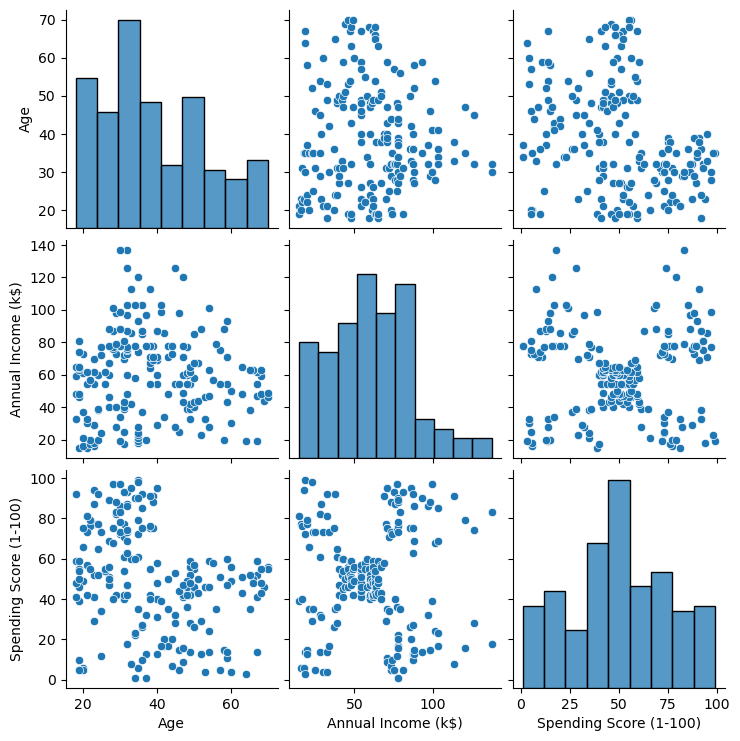

In [3]:
print("\nDataset Description:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

# Optional visualization
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.savefig("outputs/pairplot.png", dpi=150)
plt.show()


In [4]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "outputs/scaler.joblib")

['outputs/scaler.joblib']

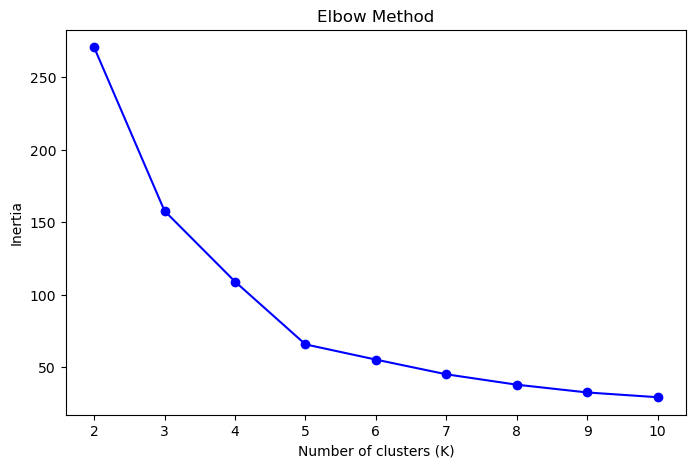

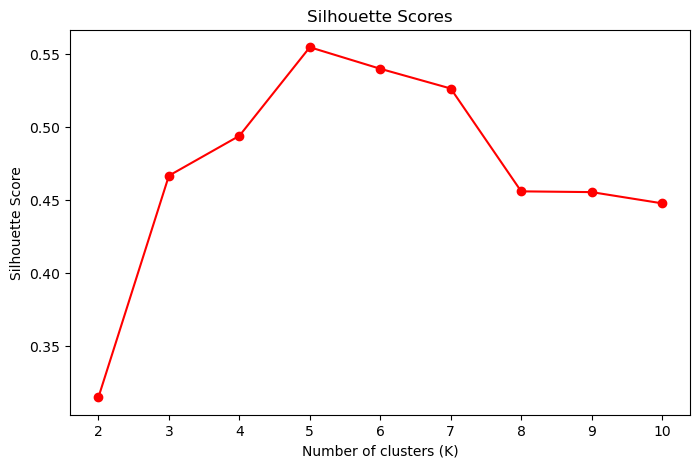

In [5]:
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Save elbow plot
plt.figure(figsize=(8,5))
plt.plot(list(K_range), inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.savefig("outputs/elbow_method.png", dpi=150)
plt.show()

# Save silhouette plot
plt.figure(figsize=(8,5))
plt.plot(list(K_range), silhouette_scores, 'ro-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.savefig("outputs/silhouette_scores.png", dpi=150)
plt.show()

In [11]:
optimal_k = np.argmax(silhouette_scores) + 2
print(f"Best K (by silhouette): {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=50)
df['Cluster'] = kmeans.fit_predict(X_scaled)


Best K (by silhouette): 5


In [12]:
centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers_original, columns=features)
centers_df.to_csv("outputs/cluster_centers.csv", index=False)
print("\nCluster Centers (original scale):")
print(centers_df)


Cluster Centers (original scale):
   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           88.200000               17.114286
2           26.304348               20.913043
3           25.727273               79.363636
4           86.538462               82.128205


In [13]:
score = silhouette_score(X_scaled, df['Cluster'])
print(f"\nSilhouette Score: {score:.3f}")


Silhouette Score: 0.555


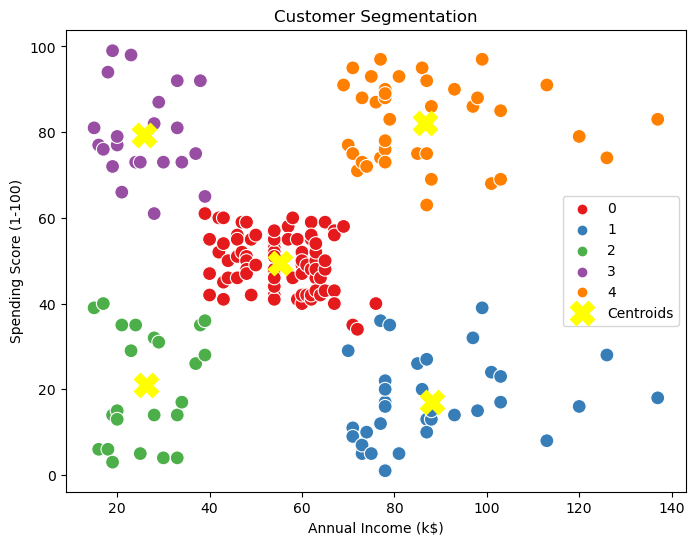

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[features[0]], y=X[features[1]], hue=df['Cluster'], palette='Set1', s=100)
plt.scatter(centers_original[:,0], centers_original[:,1], s=300, c='yellow', marker='X', label='Centroids')
plt.title('Customer Segmentation')
plt.legend()
plt.savefig("outputs/cluster_scatter.png", dpi=150)
plt.show()

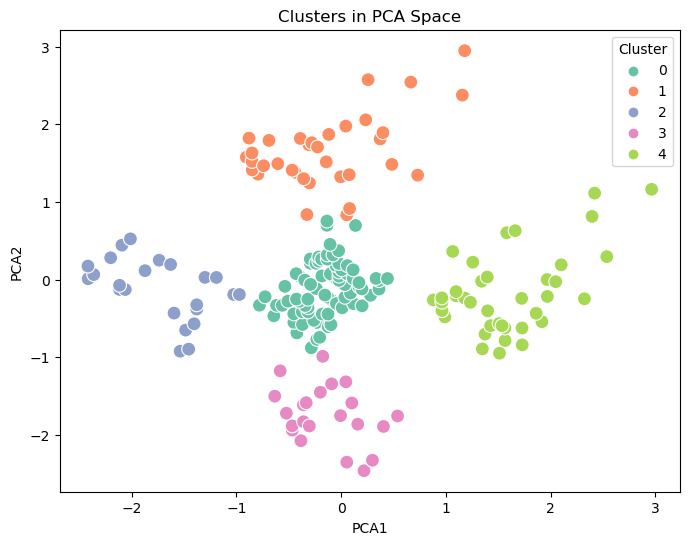

In [9]:
pca = PCA(n_components=2, random_state=42)
pca_data = pca.fit_transform(X_scaled)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Clusters in PCA Space')
plt.savefig("outputs/pca_clusters.png", dpi=150)
plt.show()


In [10]:
df.to_csv('outputs/Mall_Customers_Clustered.csv', index=False)
print("\nClustered data saved to outputs/Mall_Customers_Clustered.csv")
print("All plots & models saved in outputs/ folder.")


Clustered data saved to outputs/Mall_Customers_Clustered.csv
All plots & models saved in outputs/ folder.


🛍️ Customer Segmentation using K-Means Clustering

📌 Project Overview
The goal of this analysis is to segment customers of a mall into distinct groups based on their purchasing behavior and demographic features.  
We use **K-Means Clustering** to identify customer segments that can help in targeted marketing and business strategy.

🗂 Dataset Information
- **File Name:** `Mall_Customers.csv`  
- **Source:(https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)
- **Number of Rows:** 200  
- **Number of Columns:** 5  
- **Features:**
  - `CustomerID` – Unique customer identifier *(not used in clustering)*
  - `Gender` – Customer gender *(optional in clustering)*
  - `Age` – Age of the customer
  - `Annual Income (k$)` – Annual income in thousands of dollars
  - `Spending Score (1-100)` – Score assigned based on spending habits

📊 Methodology

### **Step 1 – Data Loading & EDA**
- Loaded the dataset using **Pandas**.
- Checked basic info, missing values, and summary statistics.
- Created pair plots to visualize relationships between features.

### **Step 2 – Feature Selection & Scaling**
- Selected features: `Annual Income (k$)` and `Spending Score (1-100)` for clustering.
- Applied **StandardScaler** to normalize feature values.

### **Step 3 – Determining Optimal K**
- Used **Elbow Method** to examine inertia vs. K.
- Used **Silhouette Score** to evaluate cluster separation quality.
- Automatically selected the K with the highest silhouette score.

### **Step 4 – Model Training**
- Trained **KMeans** clustering model with optimal `K`.
- Saved the trained model and scaler for future use.

### **Step 5 – Cluster Analysis**
- Calculated **cluster centers** in the original feature scale.
- Analyzed cluster characteristics for business insights.

### **Step 6 – Visualization**
- 2D scatter plot of customers by `Annual Income` & `Spending Score`.
- Cluster centroids highlighted for easy interpretation.
- **PCA Visualization** to show clusters in 2D space using all numerical features.

### **Step 7 – Output Storage**
- Saved:
  - `Mall_Customers_Clustered.csv` – Dataset with assigned cluster labels
  - `cluster_centers.csv` – Original-scale cluster centroids
  - Plots:
    - `elbow_method.png`
    - `silhouette_scores.png`
    - `cluster_scatter.png`
    - `pca_clusters.png`
  - Model & Scaler (`kmeans_model.joblib`, `scaler.joblib`)

📈 Results & Insights
- **Optimal K:** *Auto-selected via silhouette score.*
- **Cluster Insights:**  
  - Some clusters have **high income + high spending score** – potential premium customers.
  - Some have **low income + high spending score** – budget-conscious but active spenders.
  - Other clusters show **moderate income + low spending score** – low-engagement customers.
- **Silhouette Score:** Indicates good separation between clusters.

